#-- ABSTRACT
En este proyecto estaré utilizando el dataset denominado "Adult Census Income" (“Censo de Ingresos de Adulto”), encontrado en Kaggle (https://www.kaggle.com/datasets/uciml/adult-census-income). El mismo contiene más de 30.000 registros y 15 columnas con datos demográficos y laborales de personas residentes de Estados Unidos.

Elegí este dataset con el fin de realizar un análisis de equidad salarial, ya que la cantidad y variedad de datos ayudan a proponer diferentes hipótesis, basadas en las condiciones y situaciones de diferentes individuos.

El objetivo principal es explorar las asociaciones entre variables socioeconómicas; tales como edad, sexo, educación, horas trabajadas, capital-gain/loss, entre otras; y la probabilidad de recibir un salario de USD50.000 o mayor anual. Así mismo, se busca identificar patrones relevantes y posibles disparidades. Para ello propongo las siguientes hipótesis, sobre las cuales voy a basar el resto del análisis:
1.  Los niveles educativos más altos están asociados con una mayor probabilidad de tener ingresos anuales mayores o iguales a USD50.000.
2.  Existen diferencias dictadas por el sexo del individuo, en las cuales, aquellos de sexo masculino tienen mayor probabilidad de generar una cantidad mayor o igual a USD50.000 anules.
3.  Una mayor cantidad de horas trabajadas semanalmente aumentan la probabilidad de ganar más de USD50.000 anuales.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#-- ESTABLECIENDO EL DATAFRAME

In [40]:
#Importar el .csv y verificar las primeras filas
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [41]:
#Información de dataframe
print("Información del DataFrame")
print(df.info())

row, col = df.shape
print("\nEste dataframe tiene",row,"filas, y",col,"columnas.")

Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Este dataframe tiene 32561 filas, y 15 columnas.


In [42]:
#Cambio en encabezados con puntos por guines
df.columns = df.columns.str.replace(".", "_")
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [63]:
#Verificar valores duplicados
print("Valores duplicados:", df.duplicated().sum())

Valores duplicados: 0


In [56]:
#Eliminar valores duplicados
df = df.drop_duplicates()

In [58]:
#Reemplazar ? por NaN
df = df.replace("?", np.nan)

In [76]:
#Verificar valores nulos
print("Valores Nulos:", df.isnull().sum())

Valores Nulos: age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [77]:
#Eliminar valores nulos
#Elimino los valores ya que utilizar valores de referencia; como min/max ó media/mediana/moda; podría alterar la exactitud el resultado del análisis
df = df.dropna()

#-- ANÁLISIS

## Hipótesis 1: Relación Ingresos-Educación
- Planteamos que: Los niveles educativos más altos están asociados con una mayor probabilidad de tener ingresos anuales mayores o iguales a USD50.000.

In [98]:
#Creo una nueva columna "income_bi", en referencia a la columnas "income", en donde 1 si >50K, y 0 si <=50K.
#De esta forma el valor puede ser utilizado como número y lugo calcular otras funciones como la media/mediana/moda.
df["income_bi"] = np.where(df["income"]==">50K", 1, 0)
df["income_bi"].dtype

dtype('int64')

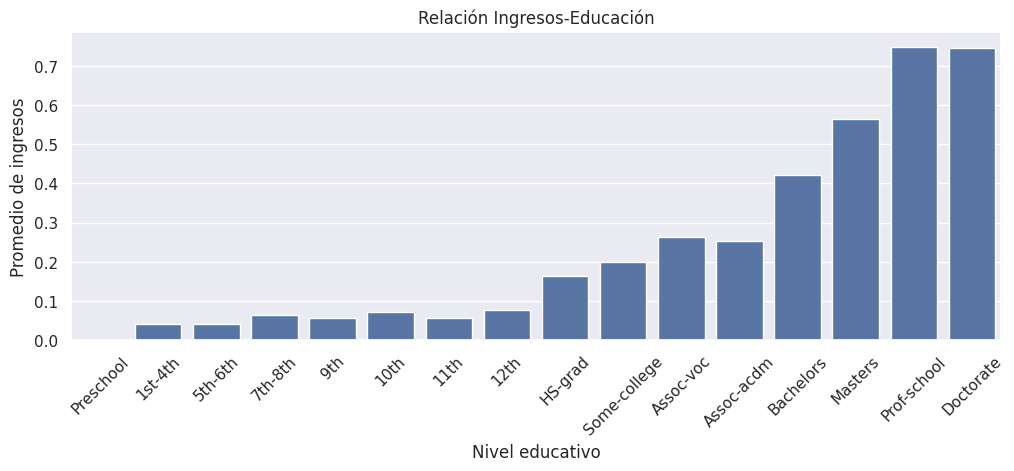

In [121]:
#Calculo el promedio por educación
income_edu = df.groupby(["education"])["income_bi"].mean().reset_index()

#Gráfico
plt.figure(figsize=(12,4))
sns.barplot(data=income_edu, x="education", y="income_bi", order=edu_order)
plt.xticks(rotation=45)
plt.title("Relación Ingresos-Educación")
plt.ylabel("Promedio de ingresos")
plt.xlabel("Nivel educativo")
plt.show()

A medida que aumenta el nivel educativo, crece la proporción de personas que ganan más de 50k. Se puede visualizar un gran aumento en la cantidad de individuos que generan ingresos mayores o iguales que USD50.000 anuales, cuanto mayor es el nivel educativo.

Esto apoya la hipótesis de que la educación influye en los ingresos.

## Hipótesis 2: Relación Ingresos-Sexo
- Planteamos que: Existen diferencias dictadas por el sexo del individuo, en las cuales, aquellos de sexo masculino tienen mayor probabilidad de generar una cantidad mayor o igual a USD50.000 anules.

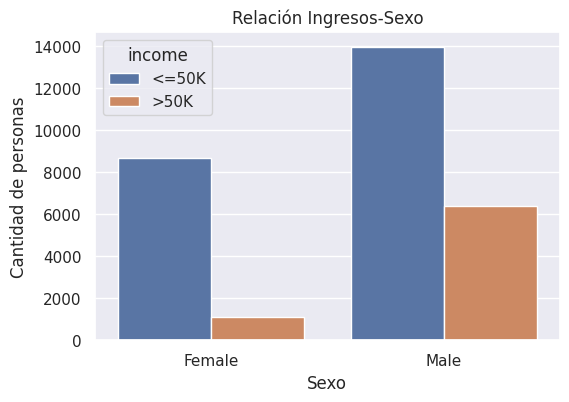

In [122]:
#Cuento la cantidad de personas según el sexo y el ingreo generado
df.groupby("sex")["income"].value_counts(normalize=True)

#Gráfico
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sex", hue="income")
plt.title("Relación Ingresos-Sexo")
plt.ylabel("Cantidad de personas")
plt.xlabel("Sexo")
plt.show()

Se puede visualizar en el gráfico que los hombres tienen una proporción mayor de ingresos mayores que USD50.000 comparados con las mujeres.

Esto refleja una brecha de género en los salarios.

## Hipótesis 3: Relación Ingresos-Horas trabajadas
- Una mayor cantidad de horas trabajadas semanalmente aumentan la probabilidad de ganar más de USD50.000 anuales.

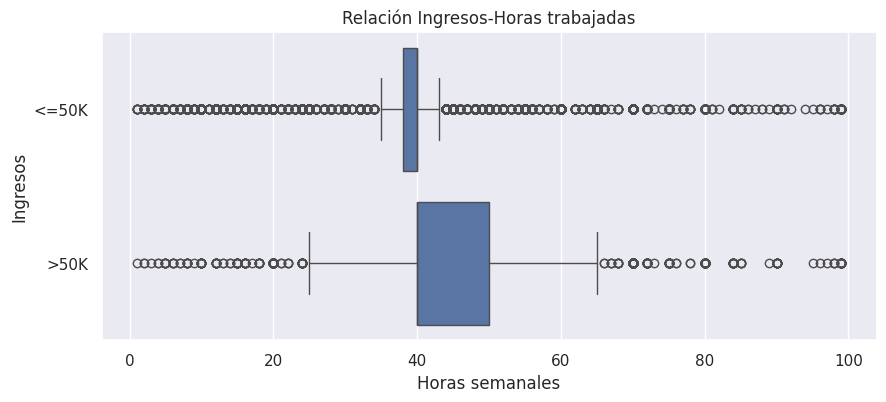

In [130]:
#Gráfico
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y="income", x="hours_per_week")
plt.title("Relación Ingresos-Horas trabajadas")
plt.xlabel("Horas semanales")
plt.ylabel("Ingresos")
plt.show()

Se puede ver en el gráfico, que quienes trabajan más horas por semana, en promedio, ganan más de USD50.000.

Esto confirma que más horas están asociadas con mayores ingresos, aunque no de manera absoluta.